# Проект 2
Цель проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

Сделать это можно с помощью модели, которая предсказывала бы результаты госэкзамена по математике для каждого ученика школы (вот она, сила ML!). Чтобы определиться с параметрами будущей модели, проведите разведывательный анализ данных и составьте отчёт по его результатам.

## Импорт необходимых библиотек и общая информация о данных

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

math_student = pd.read_csv('stud_math.csv')

In [19]:
display(math_student.head(10))
math_student.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

**Как мы видим наш файл содержит 30 столбцов и 395 строк.**

school — аббревиатура школы, в которой учится ученик

sex — пол ученика ('F' - женский, 'M' - мужской)

age — возраст ученика (от 15 до 22)

address — тип адреса ученика ('U' - городской, 'R' - за городом)

famsize — размер семьи('LE3' <= 3, 'GT3' >3)

Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

schoolsup — дополнительная образовательная поддержка (yes или no)

famsup — семейная образовательная поддержка (yes или no)

paid — дополнительные платные занятия по математике (yes или no)

activities — дополнительные внеучебные занятия (yes или no)

nursery — посещал детский сад (yes или no)

higher — хочет получить высшее образование (yes или no)

internet — наличие интернета дома (yes или no)

romantic — в романтических отношениях (yes или no)

famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

absences — количество пропущенных занятий

score — баллы по госэкзамену по математике

*studytime, granular* - ?

### Все функции, которые необходимы в дальнейшей обработке и анализе данных

In [20]:
def get_stat_dif(column):
    '''
    Функция принимает название номинативной переменной, и делает пары из всех уникальных значении. 
    И для каждой пары и score считает t статистику и p value. Затем выводит статистическо значимые колонки
    '''
    cols = math_student.loc[:, column].value_counts().index
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(math_student.loc[math_student.loc[:, column] == comb[0], 'score'],
                     math_student.loc[math_student.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break


def get_boxplot(column):
    '''
    Функция принимает название колонки и выводит boxplot для уникальных значении этой колонки и колонки score
    '''
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=column, y='score',
                data=math_student.loc[math_student.loc[:, column].isin(
                    math_student.loc[:, column].value_counts().index[:10])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()


def column_info(col, type=0):
    '''
    Функция принимает имя столбца и выводит  его info, гистограмму, и 
    если это номинативная переменная(type=1) то выводит датафрейм с частотой уникальных значении, а 
    если числовая, то выводит информацию с описательной статистикой.
    '''
    info = math_student[[col]].info()
    if type == 1:
        des = math_student[[col]].describe()
        hist = math_student[col].hist(bins=16)
        return info, display(des), hist
    else:
        df = pd.DataFrame(math_student[col].value_counts(dropna=False))
        plot = df.plot(kind='bar')
        return info, display(df), plot


def outlier_finder(col, range=0):
    '''
    Функция принимает имя столбца и если значение range=0(по умолчанию), то выводит гистограмму без выбросов.
    А если значение range 1 или 2, то выводит нижнюю границу без выбросов или верхнюю границу.
    '''
    per25 = math_student[col].quantile(0.25)
    per75 = math_student[col].quantile(0.75)
    IQR = per75 - per25
    down = per25 - 1.5*IQR
    up = per75 + 1.5*IQR
    if range == 1:
        return down
    elif range == 2:
        return up
    else:
        return math_student[col].loc[math_student[col].between(down, up)].hist()

# Первичный анализ данных в столбцах

In [21]:
math_student.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

## school

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   school  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


,school
GP,349
MS,46


(None, None, <matplotlib.axes._subplots.AxesSubplot at 0x7f06caddd040>)

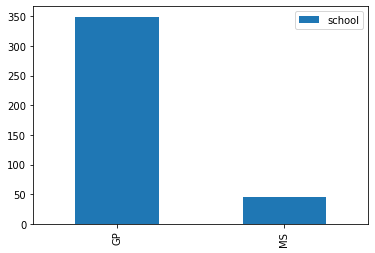

In [5]:
column_info('school')

Как мы видим в колонке School пустые значения отсутсуют. Значительное количество школьников из датасета являются учениками школы GP.

## sex

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sex     395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


,sex
F,208
M,187


(None, None, <matplotlib.axes._subplots.AxesSubplot at 0x7f06ca58b760>)

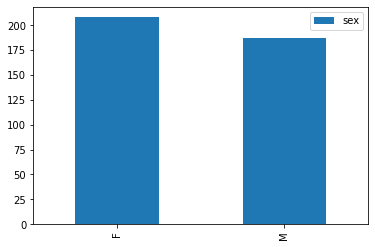

In [6]:
column_info('sex')

В колонке sex тоже пустых значении нет. 

## age

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     395 non-null    int64
dtypes: int64(1)
memory usage: 3.2 KB


,age
count,395.000000
mean,16.696203
std,1.276043
min,15.000000
25%,16.000000
50%,17.000000
75%,18.000000
max,22.000000


(None, None, <matplotlib.axes._subplots.AxesSubplot at 0x7f1b65db2d90>)

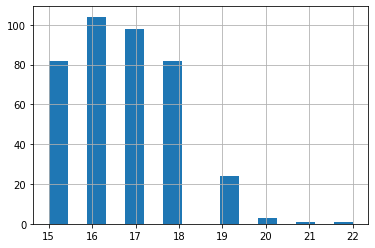

In [59]:
column_info('age', 1)

В колонке age пустых строк нет. 

## address

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  378 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


,address
U,295
R,83
NaN,17


(None, None, <matplotlib.axes._subplots.AxesSubplot at 0x7f1b65f83c70>)

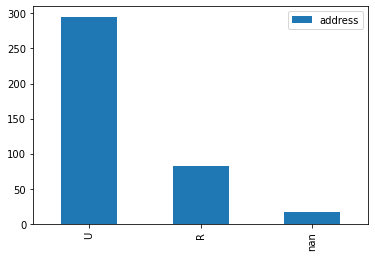

In [60]:
column_info('address')

 В колонке присутсвуют пустые значения, но они уже заполнены корректным значением(Nan). У большого количества учеников городской адрес.

## famsize

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   famsize  368 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


,famsize
GT3,261
LE3,107
NaN,27


(None, None, <matplotlib.axes._subplots.AxesSubplot at 0x7f1b65cdae80>)

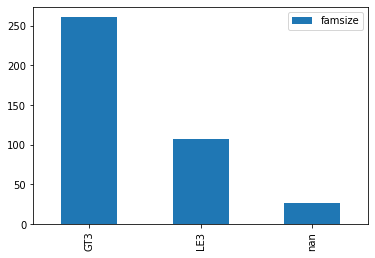

In [61]:
column_info('famsize')

Тут тоже присутствуют пустые значения. И у значительного количества учеников размер семьи больше чем 3.

## Pstatus

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Pstatus  350 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


,Pstatus
T,314
NaN,45
A,36


(None, None, <matplotlib.axes._subplots.AxesSubplot at 0x7f1b6602e700>)

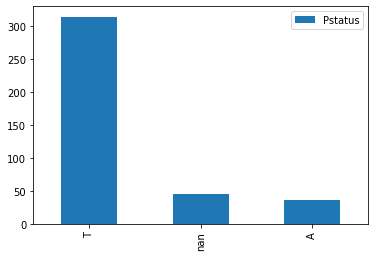

In [62]:
column_info('Pstatus')

Как мы видим в колонке значительное количество пустых значении.

## Medu

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Medu    392 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


,Medu
4.0,131
2.0,102
3.0,97
1.0,59
0.0,3
NaN,3


(None, None, <matplotlib.axes._subplots.AxesSubplot at 0x7f1b66352e80>)

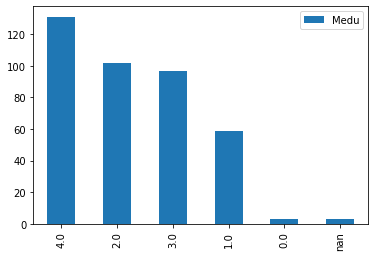

In [63]:
column_info('Medu')

В колонке незначительное количество пустых значении. Также мы видим, что в датасете очень малое количество учеников, у чьих матерей нету образования.

## Fedu

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Fedu    371 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


,Fedu
2.0,106
3.0,96
4.0,88
1.0,78
NaN,24
0.0,2
40.0,1


(None, None, <matplotlib.axes._subplots.AxesSubplot at 0x7f06ca4e2a90>)

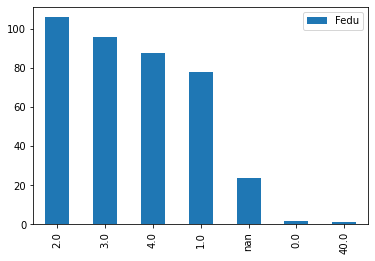

In [7]:
column_info('Fedu')

Тут пустых значении больше, но также малое число без образования. Как можно заметить есть одно побочное значение. Можно предположить при вводе данных произошла ошибка, и заменить это значение на nan.

In [2]:
math_student.Fedu = math_student.Fedu.apply(lambda x: np.nan if x==40 else x)

## Mjob and Fjob

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Mjob    376 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


,Mjob
other,133
services,98
at_home,58
teacher,55
health,32
NaN,19


(None, None, <matplotlib.axes._subplots.AxesSubplot at 0x7f1b6f540760>)

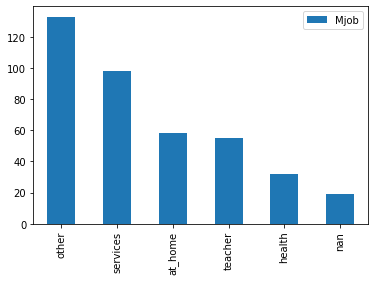

In [41]:
column_info('Mjob')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Fjob    359 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


,Fjob
other,197
services,102
NaN,36
teacher,29
at_home,16
health,15


(None, None, <matplotlib.axes._subplots.AxesSubplot at 0x7f1b6557f8b0>)

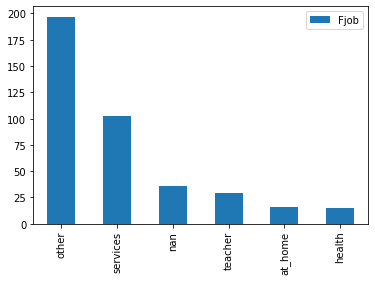

In [42]:
column_info('Fjob')

Как мы видим в обоих колонках присутсвует значительное количество пустых строк, и самые частые сферы работы родителей в нашем датасете это гос служба и другое.

## Reason 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   reason  378 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


,reason
course,137
home,104
reputation,103
other,34
NaN,17


(None, None, <matplotlib.axes._subplots.AxesSubplot at 0x7f1b65bd2520>)

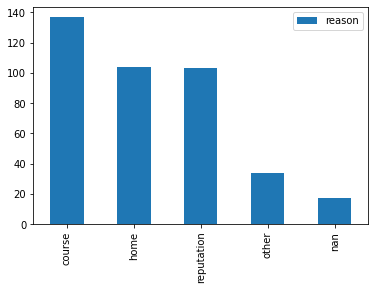

In [43]:
column_info('reason')

В колонке присутсвуют пустые значения и самая распространенная причина выбора школы - это программа образования.

## Guardian

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   guardian  364 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


,guardian
mother,250
father,86
NaN,31
other,28


(None, None, <matplotlib.axes._subplots.AxesSubplot at 0x7f1b65f59fd0>)

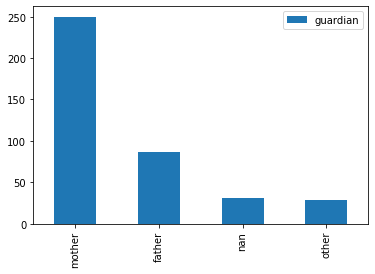

In [44]:
column_info('guardian')

В колонке большое количество пропущенных значении. И у значительной части учеников нашего датасета опекуны - матери.

## traveltime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   traveltime  367 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


,traveltime
1.0,242
2.0,96
NaN,28
3.0,22
4.0,7


(None, None, <matplotlib.axes._subplots.AxesSubplot at 0x7f1b660199d0>)

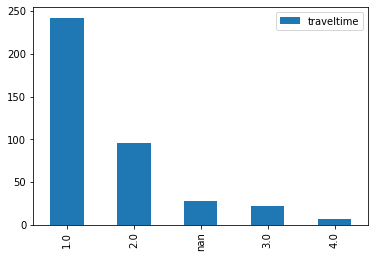

In [45]:
column_info('traveltime')

Тут тоже довольно много пропущенных строк. И малое количество  строк со значением 4

## studytime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   studytime  388 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


,studytime
2.0,194
1.0,103
3.0,64
4.0,27
NaN,7


(None, None, <matplotlib.axes._subplots.AxesSubplot at 0x7f1b65c71040>)

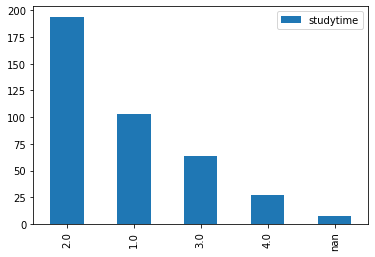

In [46]:
column_info('studytime')

В списке колонок выше есть еще одна колонка с похожим назначением studytime, granular

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studytime, granular  388 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


,"studytime, granular"
-6.0,194
-3.0,103
-9.0,64
-12.0,27
NaN,7


(None, None, <matplotlib.axes._subplots.AxesSubplot at 0x7f06ca453970>)

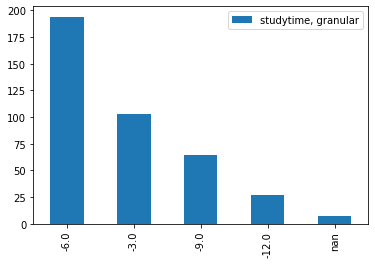

In [9]:
column_info('studytime, granular')

Можно заметить, что у них одинаковое распределение. Поэтому проверим на уровень корреляции.

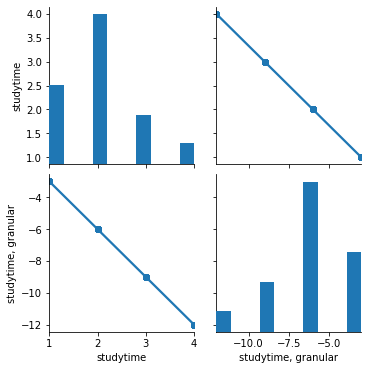

In [10]:
sns.pairplot(math_student[['studytime', 'studytime, granular']], kind='reg')

In [11]:
math_student[['studytime', 'studytime, granular']].corr()

,studytime,"studytime, granular"
studytime,1.0,-1.0
"studytime, granular",-1.0,1.0


Как мы видим они скоррелированы полностью, и можно предположить, что studytime, granular - это 
побочная колонка studytime. И вдобавок мы не знаем ее назначения, поэтому удаляем колонку studytime, granular.

In [12]:
math_student.drop(['studytime, granular'], inplace=True, axis=1)

## failures 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   failures  373 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


,failures
0.0,293
1.0,49
NaN,22
2.0,16
3.0,15


(None, None, <matplotlib.axes._subplots.AxesSubplot at 0x7f06ca284970>)

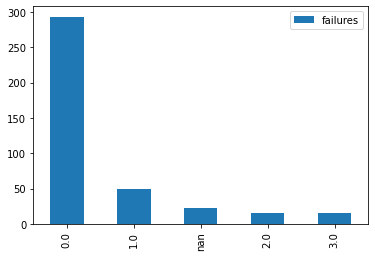

In [13]:
column_info('failures')

Тут тоже присутсвуют пустые значения. И в основном в датасете много учеников с 0 значением внеучебных неудач.

## schoolsup,  famsup, paid

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   schoolsup  386 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


,schoolsup
no,335
yes,51
NaN,9


(None, None, <matplotlib.axes._subplots.AxesSubplot at 0x7f1b663d8640>)

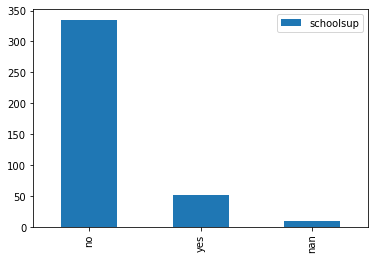

In [52]:
column_info('schoolsup')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   famsup  355 non-null    object
dtypes: object(1)
memory usage: 16.2+ KB


,famsup
yes,219
no,136
NaN,39


(None, <matplotlib.axes._subplots.AxesSubplot at 0x7f8e3a971af0>, None)

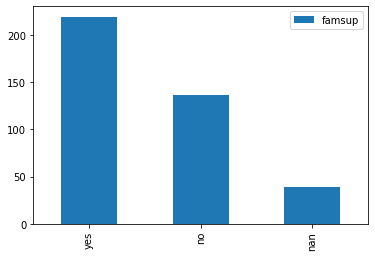

In [32]:
column_info('famsup')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   paid    354 non-null    object
dtypes: object(1)
memory usage: 16.2+ KB


,paid
no,199
yes,155
NaN,40


(None, <matplotlib.axes._subplots.AxesSubplot at 0x7f8e3aa54580>, None)

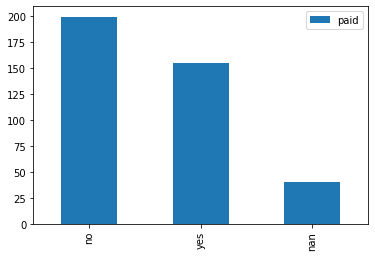

In [33]:
column_info('paid')

Как мы видим в колонке famsup и paid внушительное количество пропущенных значении.

## activities 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   activities  381 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


,activities
yes,195
no,186
NaN,14


(None, None, <matplotlib.axes._subplots.AxesSubplot at 0x7f06c81f6790>)

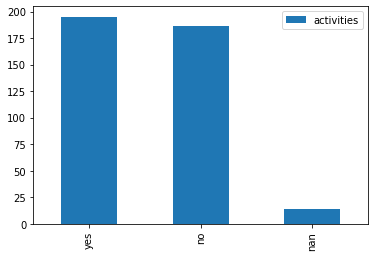

In [14]:
column_info('activities')

## nursery

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   nursery  378 non-null    object
dtypes: object(1)
memory usage: 16.2+ KB


,nursery
yes,300
no,78
NaN,16


(None, <matplotlib.axes._subplots.AxesSubplot at 0x7f8e38585760>, None)

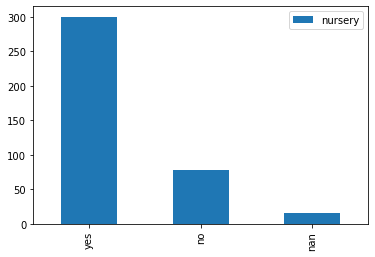

In [35]:
column_info('nursery')

Много учеников из датасета посещают внеучебные занятия, и также много учеников посещали детский сад.

## higher 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   higher  374 non-null    object
dtypes: object(1)
memory usage: 16.2+ KB


,higher
yes,356
NaN,20
no,18


(None, <matplotlib.axes._subplots.AxesSubplot at 0x7f8e38548a00>, None)

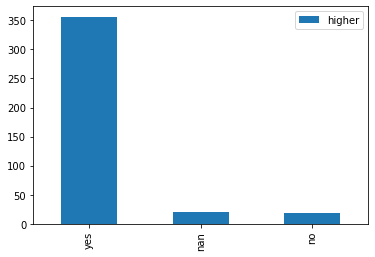

In [36]:
column_info('higher')

Тут тоже довольно немалое количество пустых строк. \
И как мы видим внушительное число учеников из датасета хотят получит высшее образование.

## internet

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   internet  360 non-null    object
dtypes: object(1)
memory usage: 16.2+ KB


,internet
yes,304
no,56
NaN,34


(None, <matplotlib.axes._subplots.AxesSubplot at 0x7f8e384c9400>, None)

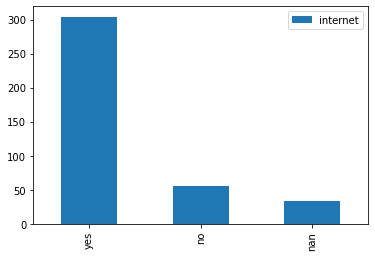

In [37]:
column_info('internet')

## romantic

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   romantic  363 non-null    object
dtypes: object(1)
memory usage: 16.2+ KB


,romantic
no,240
yes,123
NaN,31


(None, <matplotlib.axes._subplots.AxesSubplot at 0x7f8e38495fd0>, None)

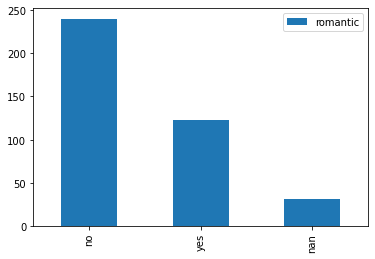

In [38]:
column_info('romantic')

В колонке немало пропущенных строк.  
И как мы видим в датасете много учеников, несостоящих в романтических отношениях


## famrel

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   famrel  368 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


,famrel
4.0,182
5.0,99
3.0,62
NaN,27
2.0,17
1.0,7
-1.0,1


(None, None, <matplotlib.axes._subplots.AxesSubplot at 0x7f06c814f6a0>)

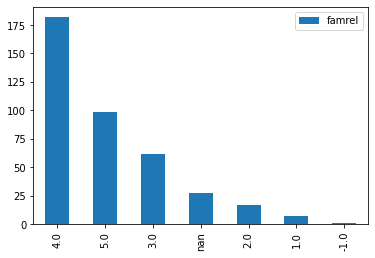

In [15]:
column_info('famrel')

Тут тоже большое количество пропущенных строк. И как мы видим у нас есть одно побочное значение. Можно предположить при вводе данных произошла ошибка, и заменить это значение на nan.

In [3]:
math_student.famrel = math_student.famrel.apply(lambda x: np.nan if x==-1 else x)

## freetime

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   freetime  383 non-null    float64
dtypes: float64(1)
memory usage: 16.2 KB


,freetime
3.0,153
4.0,111
2.0,63
5.0,38
1.0,18
NaN,11


(None, <matplotlib.axes._subplots.AxesSubplot at 0x7f8e38466940>, None)

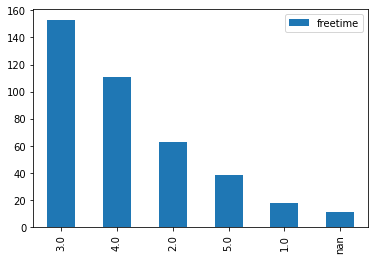

In [41]:
column_info('freetime')

В колонке довольно мало пустых строк. И у многих учеников среднее количество свободного времени.

## goout

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   goout   386 non-null    float64
dtypes: float64(1)
memory usage: 16.2 KB


,goout
3.0,127
2.0,101
4.0,84
5.0,51
1.0,23
NaN,8


(None, <matplotlib.axes._subplots.AxesSubplot at 0x7f8e38350ca0>, None)

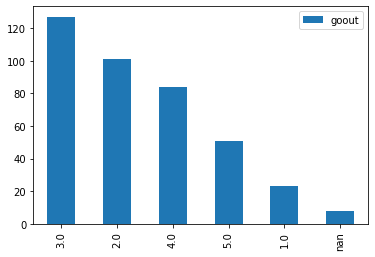

In [42]:
column_info('goout')

Тут тоже мало пропущенных строк и многие ученики проводят среднее количество времени с друзьями.

## health

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   health  379 non-null    float64
dtypes: float64(1)
memory usage: 16.2 KB


,health
5.0,138
3.0,89
4.0,63
1.0,46
2.0,43
NaN,15


(None, <matplotlib.axes._subplots.AxesSubplot at 0x7f8e3833dd90>, None)

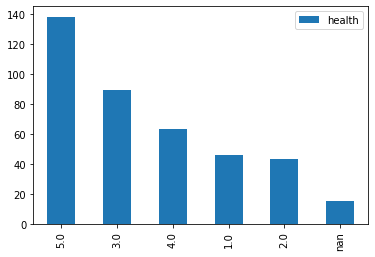

In [43]:
column_info('health')

Как мы видим у многих учеников состояние здоровья очень хорошее и среднее.

## absences

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   absences  383 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


,absences
count,383.000000
mean,7.279373
std,23.465197
min,0.000000
25%,0.000000
50%,4.000000
75%,8.000000
max,385.000000


(None, None, <matplotlib.axes._subplots.AxesSubplot at 0x7f8a5d096820>)

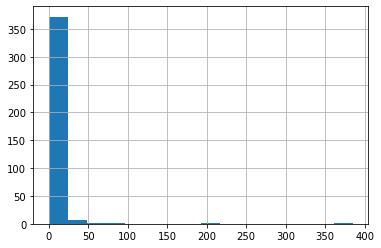

In [6]:
column_info('absences', 1)

Как мы видим в колонке есть выбросы. Поэтому избавляемся от них

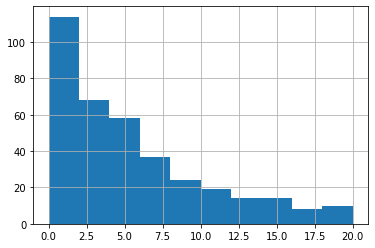

In [7]:
outlier_finder('absences')

In [8]:
math_student = math_student.loc[math_student.absences.between(
    outlier_finder('absences', range=1), outlier_finder('absences', range=2))]

## score

<class 'pandas.core.frame.DataFrame'>
Int64Index: 366 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   score   361 non-null    float64
dtypes: float64(1)
memory usage: 5.7 KB


,score
count,361.000000
mean,51.994460
std,22.956117
min,0.000000
25%,40.000000
50%,55.000000
75%,70.000000
max,100.000000


(None, None, <matplotlib.axes._subplots.AxesSubplot at 0x7f8a5c7e2610>)

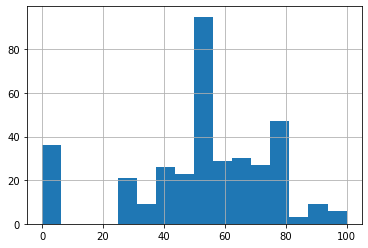

In [9]:
column_info('score', 1)

Можно предположить, что экзамен оценивался по 100 балльной шкале. Избавляемся от экстремально низких и высоких значении

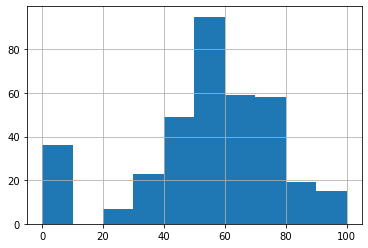

In [10]:
outlier_finder('score')

In [11]:
math_student = math_student.loc[math_student.score.between(outlier_finder('score', 1), outlier_finder('score', 2))]

## Корреляционный анализ данных

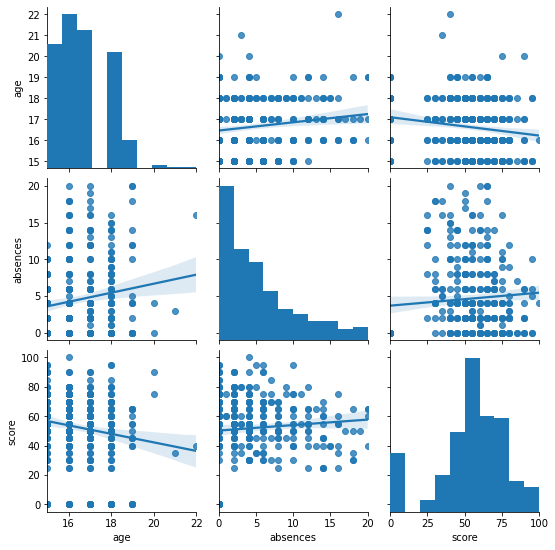

In [12]:
sns.pairplot(math_student[['age','absences', 'score']], kind='reg')

In [13]:
math_student[['age', 'absences', 'score']].corr()

,age,absences,score
age,1.000000,0.155469,-0.159306
absences,0.155469,1.000000,0.081274
score,-0.159306,0.081274,1.000000


Как мы видим в датасете нет полностью скоррелированных числовых столбцов. Поэтому оставим их всех.

## Анализ номинативных переменных и t тест

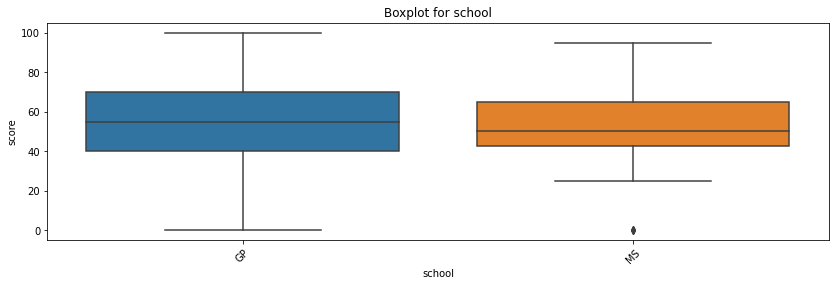

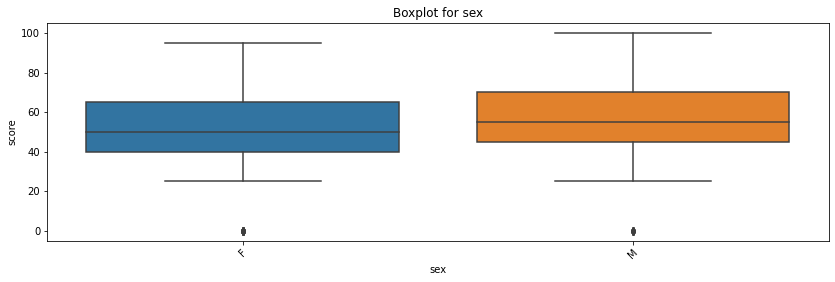

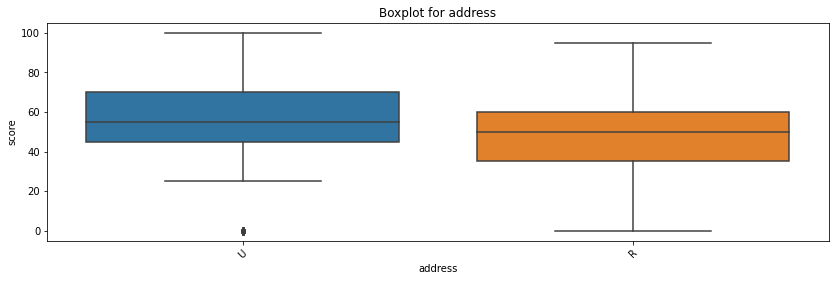

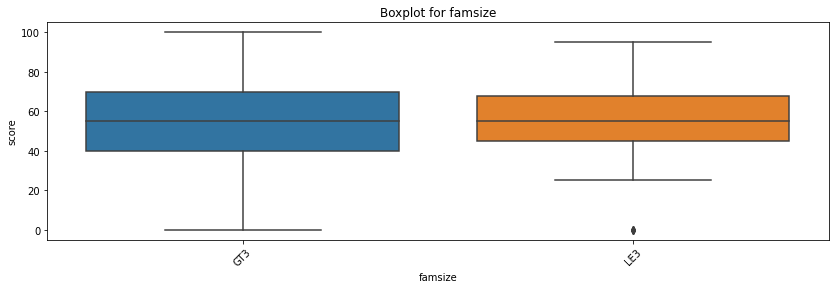

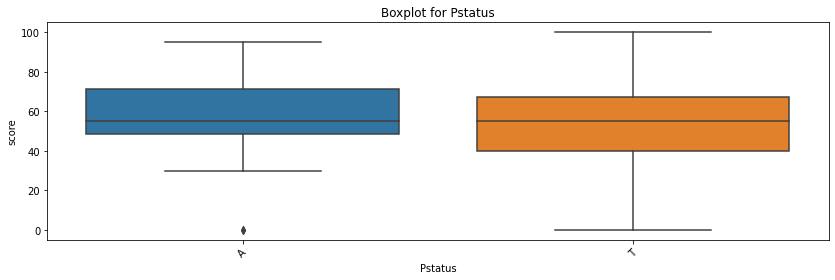

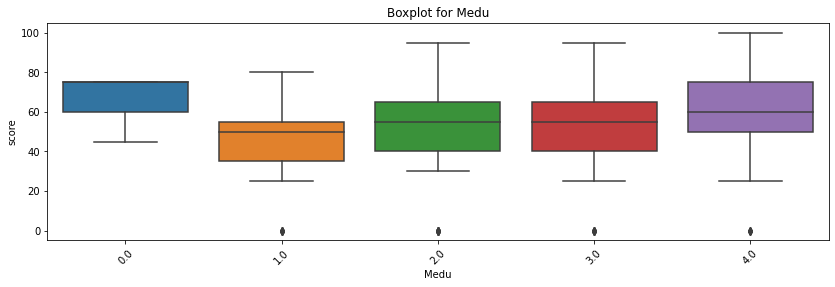

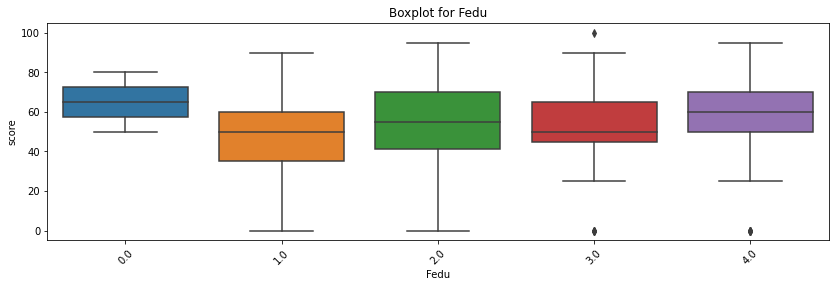

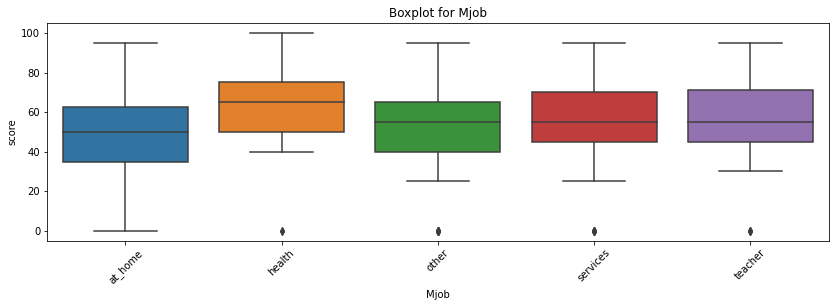

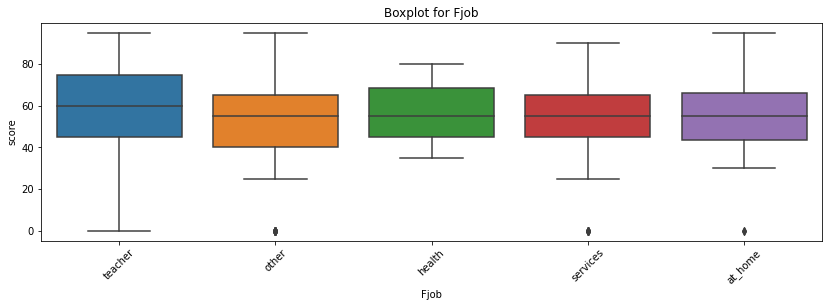

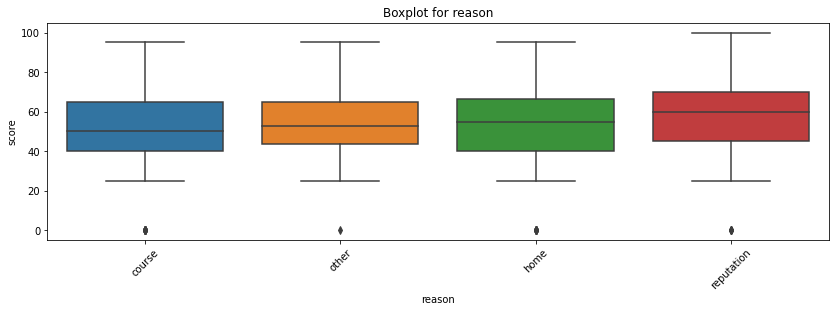

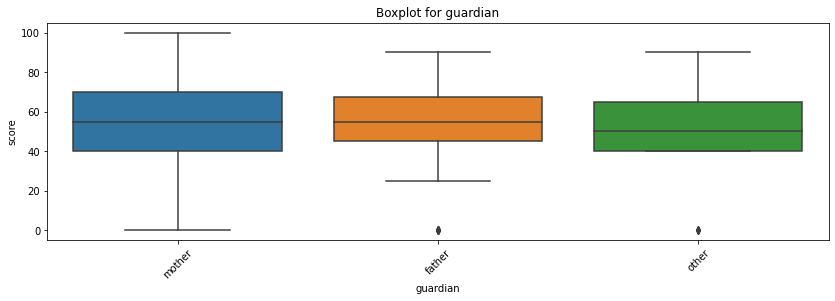

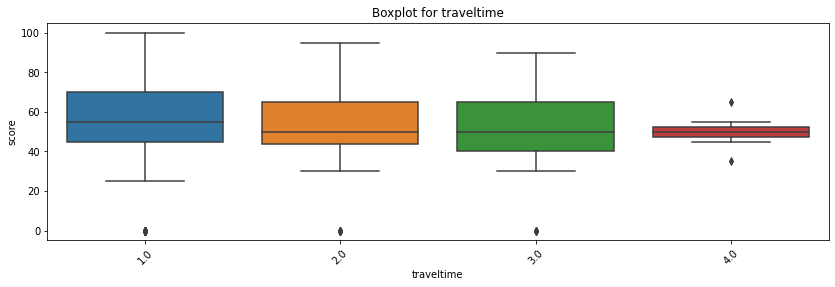

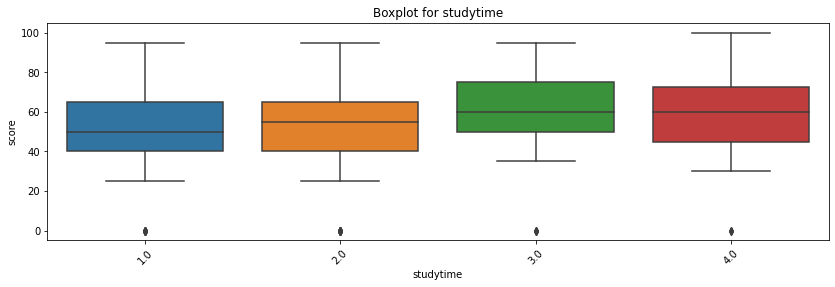

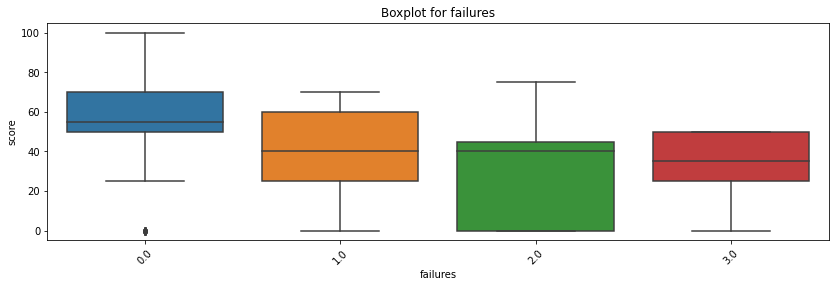

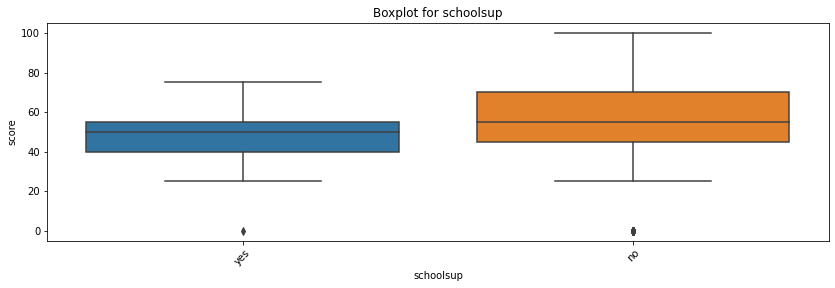

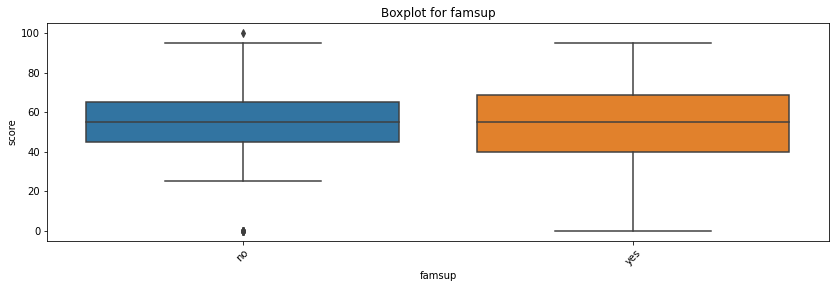

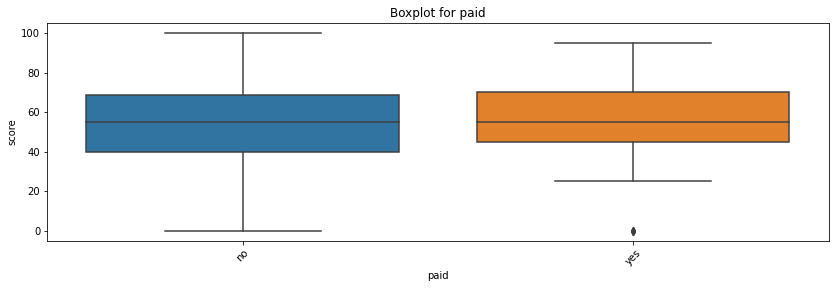

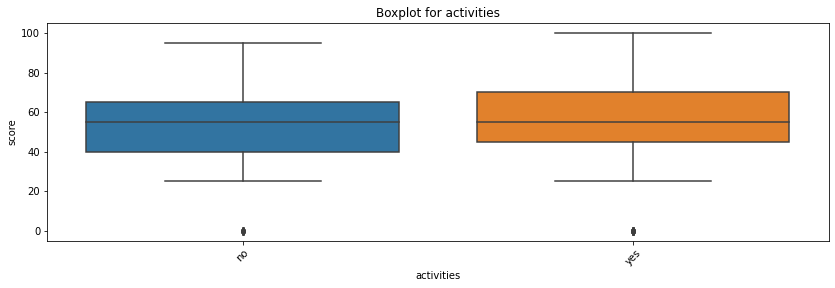

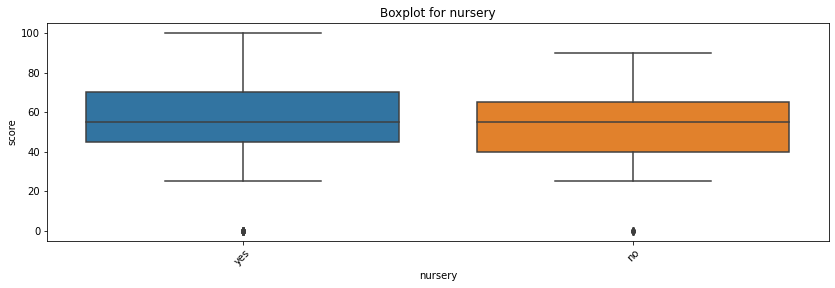

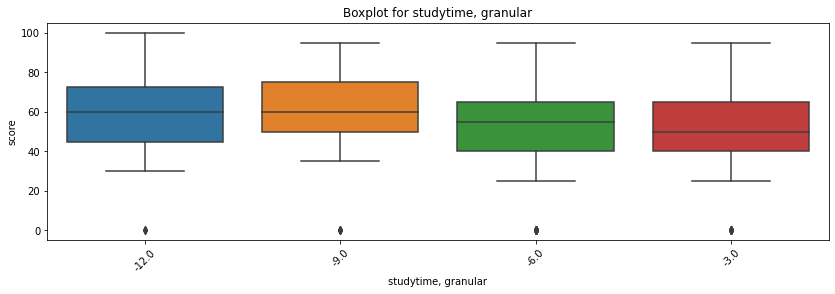

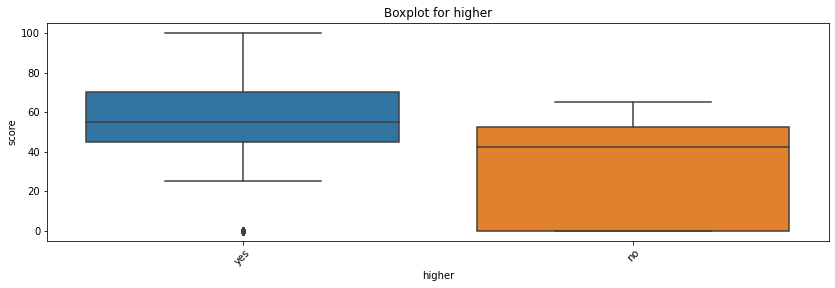

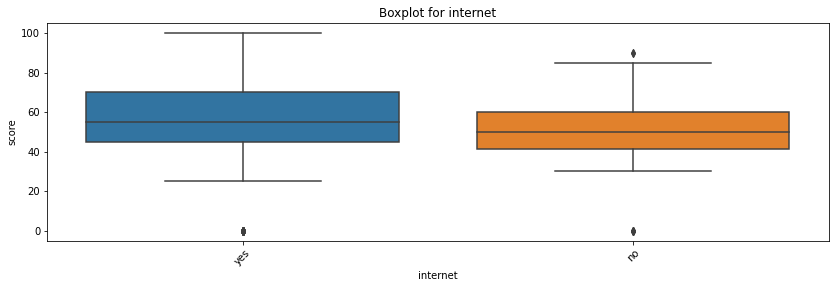

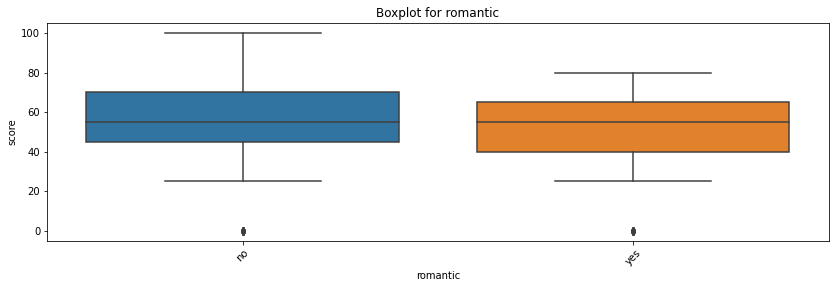

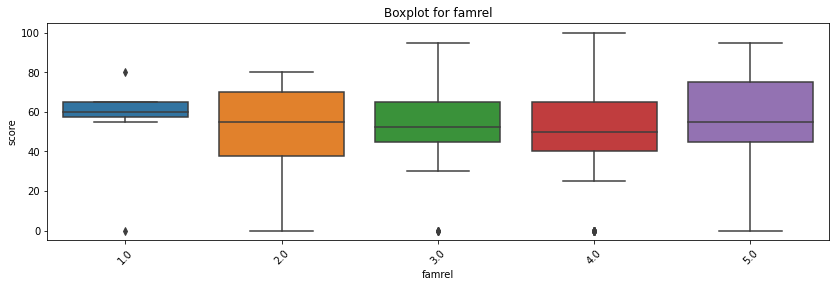

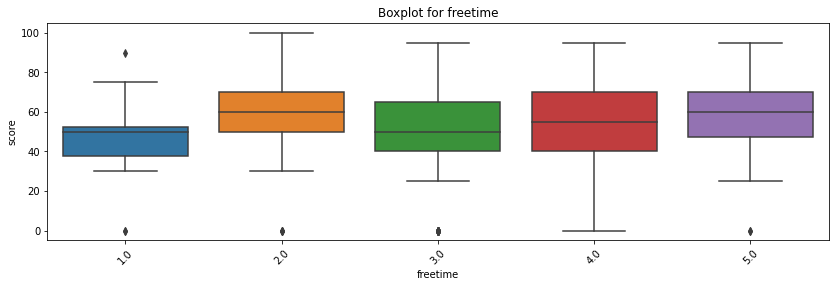

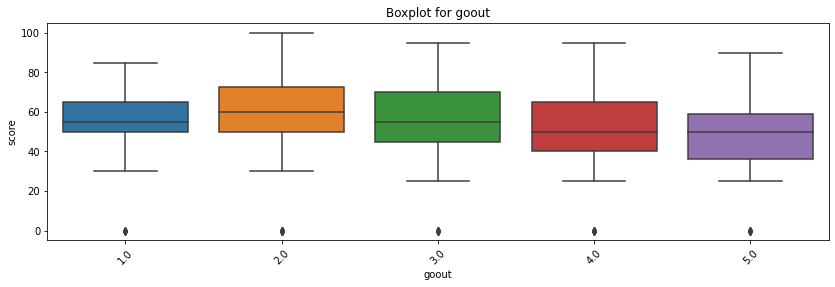

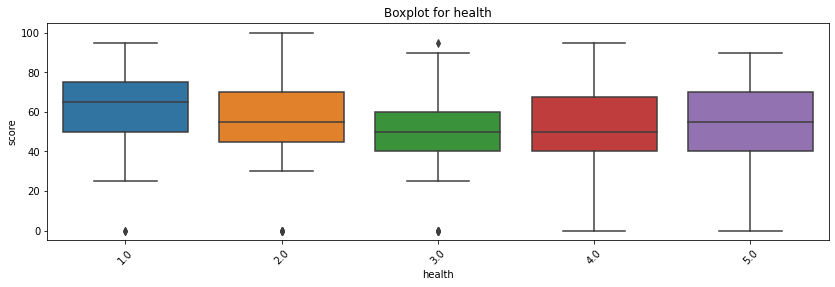

In [14]:
for col in math_student.columns:
    if col not in ['age','absences', 'score']:
        get_boxplot(col)

По графикам похоже, что все параметры, кроме nursery, paid, Pstatus, могут влиять на баллы в экзамене.    
Но давайте проверим это используя t статистику. 

In [15]:
for col in math_student.columns:
    if col not in ['age','absences', 'score']:
        get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Medu
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки paid
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic


Как мы видим серьёзно отличаются 8 параматров. Оставим эти переменные в датасете для дальнейшего построения модели. Итак, в нашем случае важные переменные, которые, возможно, оказывают влияние на оценку экзамена, это:   age, absences, sex, address, Medu, Mjob, studytime, failures, schoollsup, goout.

In [16]:
math_stud_for_model = math_student.loc[:, [
    'age', 'absences', 'sex', 'address', 'Medu', 'Mjob', 'studytime', 'failures', 'schoolsup', 'goout']]

In [17]:
math_stud_for_model.head(10)

,age,absences,sex,address,Medu,Mjob,studytime,failures,schoolsup,goout
0,18,6.0,F,U,4.0,at_home,2.0,0.0,yes,4.0
1,17,4.0,F,U,1.0,at_home,2.0,0.0,no,3.0
2,15,10.0,F,U,1.0,at_home,2.0,3.0,yes,2.0
3,15,2.0,F,U,4.0,health,3.0,0.0,no,2.0
4,16,4.0,F,U,3.0,other,2.0,0.0,no,2.0
5,16,10.0,M,U,4.0,services,2.0,0.0,no,2.0
6,16,0.0,M,NaN,2.0,other,2.0,0.0,no,4.0
7,17,6.0,F,U,4.0,other,2.0,0.0,yes,4.0
8,15,0.0,M,U,3.0,services,2.0,0.0,no,2.0
9,15,0.0,M,U,3.0,other,2.0,0.0,no,1.0


# Выводы
- в данных мало пропущенных значении, и только в столбцах Fedu и famrel были побочные значения. И была колонка studytime, granular, которая была полностью скоррелирована со столбцом studytime.
- Выбросы найдены только в столбцах с оценкой и количеством пропущенных занятии, что позволяет сделать вывод о том, что данные достаточно чистые. Но в столбцах Fedu и famrel были побочные значения. И был столбец studytime, granular, который по предположению был побочным столбцом studytime.
- Самые важные параметры, которые предлагается использовать в дальнейшем для построения модели, это age, absences, sex, address, Medu, Mjob, studytime, failures, schoollsup, goout.
